# Import libraries

In [189]:
import itertools
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.ticker import NullFormatter
import pandas as pd
import numpy as np
import matplotlib.ticker as ticker
from sklearn import preprocessing
%matplotlib inline

file = pd.read_csv('Diamond_Data.csv')

# Explore initially

In [190]:
df = file.head(6000)
df = pd.DataFrame(df)
df.head()
df.count()

ID                   6000
Carat Weight         6000
Cut                  5855
Color                6000
Clarity              5976
Polish               6000
Symmetry             5806
Report               5640
Source Country       5757
Mine Temperature     5757
Price                6000
dtype: int64

In [191]:
# count nulls and drop empty values
df = df.dropna(subset=['Cut'])
df = df.dropna(subset=['Clarity'])
df = df.dropna(subset=['Symmetry'])
df.shape
df.head()

,ID,Carat Weight,Cut,Color,Clarity,Polish,Symmetry,Report,Source Country,Mine Temperature,Price
0,1.0,1.10,Ideal,H,SI1,VG,EX,GIA,Angola,7.6,5169.0
1,2.0,0.83,Ideal,H,VS1,ID,ID,AGSL,Angola,9.0,3470.0
2,3.0,0.85,Ideal,H,SI1,EX,EX,GIA,South Africa,11.3,3183.0
3,4.0,0.91,Ideal,E,SI1,VG,VG,GIA,Australia,12.9,4370.0
4,5.0,0.83,Ideal,G,SI1,EX,EX,GIA,Canada,7.3,3171.0


In [192]:
# Feature Set
df.columns

Index(['ID', 'Carat Weight', 'Cut', 'Color', 'Clarity', 'Polish', 'Symmetry',
       'Report', 'Source Country', 'Mine Temperature ', 'Price'],
      dtype='object')

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000000000BFC42E8>]],
      dtype=object)

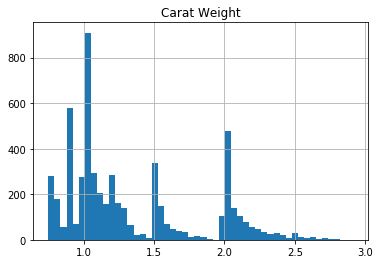

In [193]:
df.hist(column ='Carat Weight', bins = 50)

In [194]:
df['Cut'].unique()

array(['Ideal', 'Very Good', 'Fair', 'Good', 'Signature-Ideal', 'Idea!',
       'Very Goo', 'Goo', 'Signature-Idea!'], dtype=object)

# Process data and convert to onehot columns

In [134]:
#convert cut, color clarity to numericals
# df['Cut'].replace('Goo','Good',inplace = True)
# df['Cut'].replace('Idea!','Ideal',inplace = True)
# df['Cut'].replace('Signature-Idea!','Signature-Ideal',inplace = True)
# df['Cut'].replace('Very Goo','Very Good',inplace = True)

# onehot_cut = pd.get_dummies(df['Cut'])
# onehot_cut.shape

(5637, 5)

In [136]:
# onehot_color = pd.get_dummies(df['Color'])
# onehot_color.shape

(5637, 6)

In [137]:
# df['Clarity'].unique()

array(['SI1', 'VS1', 'VS2', 'VVS2', 'VVS1', 'IF', 'FL', 'VG', 'EX', 'ID',
       'G'], dtype=object)

In [138]:
# df['Clarity'].replace('EX','FL/IF',inplace = True)
# df['Clarity'].replace('FL','FL/IF',inplace = True)
# df['Clarity'].replace('IF','FL/IF',inplace = True)

# df['Clarity'].replace('VVS1','VVS1/VVS2',inplace = True)
# df['Clarity'].replace('VVS2','VVS1/VVS2',inplace = True)

# df['Clarity'].replace('VS1','VS1/VS2',inplace = True)
# df['Clarity'].replace('VS2','VS1/VS2',inplace = True)

# df['Clarity'].replace('SI1','SI1/SI2',inplace = True)
# df['Clarity'].replace('SI2','SI1/SI2',inplace = True)

# df['Clarity'].replace('G','VS1/VS2',inplace = True)
# df['Clarity'].replace('VG','VVS1/VVS2',inplace = True)
# df['Clarity'].replace('ID','FL/IF',inplace = True)

# onehot_clarity = pd.get_dummies(df['Clarity'])
# onehot_clarity.shape

(5637, 4)

In [139]:
# # combine all onehot 
# df_features = pd.merge(onehot_clarity,onehot_color, right_index=True, left_index=True)
# df_features = pd.merge(df_features, onehot_cut,right_index=True, left_index=True)
# df_features.head()

,FL/IF,SI1/SI2,VS1/VS2,VVS1/VVS2,D,E,F,G,H,I,Fair,Good,Ideal,Signature-Ideal,Very Good
0,0,1,0,0,0,0,0,0,1,0,0,0,1,0,0
1,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0
2,0,1,0,0,0,0,0,0,1,0,0,0,1,0,0
3,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0
4,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0


# alt: Clean data and convert to numerical

In [206]:
# try to create feature set without onehot encoding 
#df['Cut'].unique() # array(['Ideal', 'Very Good', 'Fair', 'Good', 'Signature-Ideal'], dtype=object)

df['Cut'].replace('Goo','Good',inplace = True)
df['Cut'].replace('Idea!','Ideal',inplace = True)
df['Cut'].replace('Signature-Idea!','Signature-Ideal',inplace = True)
df['Cut'].replace('Very Goo','Very Good',inplace = True)

df['Cut'].replace('Signature-Ideal', 5, inplace=True)
df['Cut'].replace('Ideal', 4, inplace=True)
df['Cut'].replace('Very Good', 3, inplace=True)
df['Cut'].replace('Good', 2, inplace=True)
df['Cut'].replace('Fair', 1, inplace=True)

df['Cut'].head()

0    4
1    4
2    4
3    4
4    4
Name: Cut, dtype: int64

In [207]:
#df['Color'].unique()

df['Color'].replace('D', 6, inplace=True)
df['Color'].replace('E', 5, inplace=True)
df['Color'].replace('F', 4, inplace=True)
df['Color'].replace('G', 3, inplace=True)
df['Color'].replace('H', 2, inplace=True)
df['Color'].replace('I', 1, inplace=True)

df['Color'].head()

0    2
1    2
2    2
3    5
4    3
Name: Color, dtype: int64

In [208]:
#df['Clarity'].unique()
df['Clarity'].replace('EX','FL/IF',inplace = True)
df['Clarity'].replace('FL','FL/IF',inplace = True)
df['Clarity'].replace('IF','FL/IF',inplace = True)

df['Clarity'].replace('VVS1','VVS1/VVS2',inplace = True)
df['Clarity'].replace('VVS2','VVS1/VVS2',inplace = True)

df['Clarity'].replace('VS1','VS1/VS2',inplace = True)
df['Clarity'].replace('VS2','VS1/VS2',inplace = True)

df['Clarity'].replace('SI1','SI1/SI2',inplace = True)
df['Clarity'].replace('SI2','SI1/SI2',inplace = True)

df['Clarity'].replace('G','VS1/VS2',inplace = True)
df['Clarity'].replace('VG','VVS1/VVS2',inplace = True)
df['Clarity'].replace('ID','FL/IF',inplace = True)


df['Clarity'].replace('FL/IF', 4, inplace=True)
df['Clarity'].replace('VVS1/VVS2', 3, inplace=True)
df['Clarity'].replace('VS1/VS2', 2, inplace=True)
df['Clarity'].replace('SI1/SI2', 1, inplace=True)

df['Clarity'].head()

0    1
1    2
2    1
3    1
4    1
Name: Clarity, dtype: int64

In [209]:
df_features = df[['Carat Weight', 'Cut', 'Color', 'Clarity']]
df_features[0:5]
# #

# df_features = pd.merge(onehot_clarity,onehot_color, right_index=True, left_index=True)
# df_features = pd.merge(df_features, onehot_cut,right_index=True, left_index=True)
# df_features.head()

,Carat Weight,Cut,Color,Clarity
0,1.10,4,2,1
1,0.83,4,2,2
2,0.85,4,2,1
3,0.91,4,5,1
4,0.83,4,3,1


# Begin K means clustering

In [210]:
X = df_features #.astype(float)
X[0:5]

,Carat Weight,Cut,Color,Clarity
0,1.10,4,2,1
1,0.83,4,2,2
2,0.85,4,2,1
3,0.91,4,5,1
4,0.83,4,3,1


In [211]:
y = df['Price']
y[0:5]

0    5169.0
1    3470.0
2    3183.0
3    4370.0
4    3171.0
Name: Price, dtype: float64

In [212]:
# Normalise data (not needed if feature variables are onehot encoded)
X = preprocessing.StandardScaler().fit(X).transform(X.astype(float))

C:\Users\dstraton\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\preprocessing\data.py:625: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)


In [213]:
# Train test split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.2, random_state=4)
print ('Train set:', X_train.shape,  y_train.shape)
print ('Test set:', X_test.shape,  y_test.shape)

Train set: (4509, 4) (4509,)
Test set: (1128, 4) (1128,)


In [214]:
# kmeans clustering section
from sklearn.neighbors import KNeighborsClassifier

k = 100

# train model and predict
neigh = KNeighborsClassifier(n_neighbors=k).fit(X_train, y_train)

# DONT USE kmeans = KMeans(n_clusters = kclusters, random_state=0_.fit(variable))

# DOTN USE kmeans.labels_

In [215]:
# predicting the test set

yhat = neigh.predict(X_test)
yhat[0:5]

array([4466., 8753., 4370., 3526., 5777.])

In [216]:
# Accuracy Evaluation
from sklearn import metrics
print("Train set Accuracy: ", metrics.accuracy_score(y_train, neigh.predict(X_train)))
print("Test set Accuracy: ", metrics.accuracy_score(y_test, yhat))

Train set Accuracy:  0.01907296518074961
Test set Accuracy:  0.0026595744680851063


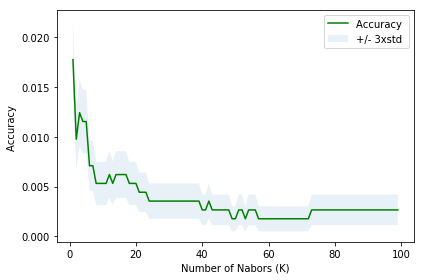

The best accuracy was with 0.01773049645390071 with k= 1


In [217]:
Ks = 10
mean_acc = np.zeros((Ks-1))
std_acc = np.zeros((Ks-1))
ConfustionMx = [];
for n in range(1,Ks):
    
    #Train Model and Predict  
    neigh = KNeighborsClassifier(n_neighbors = n).fit(X_train,y_train)
    yhat=neigh.predict(X_test)
    mean_acc[n-1] = metrics.accuracy_score(y_test, yhat)

    
    std_acc[n-1]=np.std(yhat==y_test)/np.sqrt(yhat.shape[0])

mean_acc

plt.plot(range(1,Ks),mean_acc,'g')
plt.fill_between(range(1,Ks),mean_acc - 1 * std_acc,mean_acc + 1 * std_acc, alpha=0.10)
plt.legend(('Accuracy ', '+/- 3xstd'))
plt.ylabel('Accuracy ')
plt.xlabel('Number of Nabors (K)')
plt.tight_layout()
plt.show()

print( "The best accuracy was with", mean_acc.max(), "with k=", mean_acc.argmax()+1) 

In [163]:
df.head()


,ID,Carat Weight,Cut,Color,Clarity,Polish,Symmetry,Report,Source Country,Mine Temperature,Price
0,1.0,1.10,4,2,1,VG,EX,GIA,Angola,7.6,5169.0
1,2.0,0.83,4,2,2,ID,ID,AGSL,Angola,9.0,3470.0
2,3.0,0.85,4,2,1,EX,EX,GIA,South Africa,11.3,3183.0
3,4.0,0.91,4,5,1,VG,VG,GIA,Australia,12.9,4370.0
4,5.0,0.83,4,3,1,EX,EX,GIA,Canada,7.3,3171.0


# Attempt Multiple Linear Regression

In [219]:
# try multiple regression model
msk = np.random.rand(len(df)) < 0.8
train = df[msk]
test = df[~msk]

from sklearn import linear_model
regr = linear_model.LinearRegression()

x = np.asanyarray(train[['Carat Weight', 'Cut','Clarity', 'Color']])
y = np.asanyarray(train[['Price']])
regr.fit(x,y)
print('Coeffients: ', regr.coef_)

y_hat = regr.predict(test[['Carat Weight', 'Cut','Clarity', 'Color']])
x = np.asanyarray(test[['Carat Weight', 'Cut','Clarity', 'Color']])
y = np.asanyarray(test[['Price']])
print('Residual sum of squares: %.2f'
      % np.mean((y_hat-y)**2))

print('Variance score: %.2f' % regr.score(x,y))

Coeffients:  [[18457.20195926   606.35182263  2157.98981929  1614.92048623]]
Residual sum of squares: 17807843.25
Variance score: 0.84


In [164]:
df.head()

,ID,Carat Weight,Cut,Color,Clarity,Polish,Symmetry,Report,Source Country,Mine Temperature,Price
0,1.0,1.10,4,2,1,VG,EX,GIA,Angola,7.6,5169.0
1,2.0,0.83,4,2,2,ID,ID,AGSL,Angola,9.0,3470.0
2,3.0,0.85,4,2,1,EX,EX,GIA,South Africa,11.3,3183.0
3,4.0,0.91,4,5,1,VG,VG,GIA,Australia,12.9,4370.0
4,5.0,0.83,4,3,1,EX,EX,GIA,Canada,7.3,3171.0


# Attempt Linear Regression

In [168]:
# try Linear regression on Carat Weight
msk = np.random.rand(len(df)) < 0.8
train = df[msk]
test = df[~msk]

from sklearn import linear_model
regr = linear_model.LinearRegression()
train_x = np.asanyarray(train[['Carat Weight']])
train_y = np.asanyarray(train[['Price']])
regr.fit (train_x, train_y)
# The coefficients
print ('Coefficients: ', regr.coef_)
print ('Intercept: ', regr.intercept_)

# plt.scatter(train.Carat Weight, train.Price,  color='blue')
# plt.plot(train_x, regr.coef_[0][0]*train_x + regr.intercept_[0], '-r')
# plt.xlabel("Engine size")
# plt.ylabel("Emission")

from sklearn.metrics import r2_score

test_x = np.asanyarray(test[['Carat Weight']])
test_y = np.asanyarray(test[['Price']])
test_y_hat = regr.predict(test_x)

print("Mean absolute error: %.2f" % np.mean(np.absolute(test_y_hat - test_y)))
print("Residual sum of squares (MSE): %.2f" % np.mean((test_y_hat - test_y) ** 2))
print("R2-score: %.2f" % r2_score(test_y_hat , test_y) )

Coefficients:  [[18345.28830375]]
Intercept:  [-12696.25153848]
Mean absolute error: 3032.25
Residual sum of squares (MSE): 27323410.22
R2-score: 0.64


# Attempt Polynomial Regression


In [173]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn import linear_model
train_x = np.asanyarray(train[['Carat Weight']])
train_y = np.asanyarray(train[['Price']])

test_x = np.asanyarray(test[['Carat Weight']])
test_y = np.asanyarray(test[['Price']])


poly = PolynomialFeatures(degree=2)
train_x_poly = poly.fit_transform(train_x)
train_x_poly

clf = linear_model.LinearRegression()
train_y_ = clf.fit(train_x_poly, train_y)
# The coefficients
print ('Coefficients: ', clf.coef_)
print ('Intercept: ',clf.intercept_)

# plt.scatter(train.ENGINESIZE, train.CO2EMISSIONS,  color='blue')
# XX = np.arange(0.0, 10.0, 0.1)
# yy = clf.intercept_[0]+ clf.coef_[0][1]*XX+ clf.coef_[0][2]*np.power(XX, 2)
# plt.plot(XX, yy, '-r' )
# plt.xlabel("Engine size")
# plt.ylabel("Emission")

from sklearn.metrics import r2_score

test_x_poly = poly.fit_transform(test_x)
test_y_ = clf.predict(test_x_poly)

print("Mean absolute error: %.2f" % np.mean(np.absolute(test_y_ - test_y)))
print("Residual sum of squares (MSE): %.2f" % np.mean((test_y_ - test_y) ** 2))
print("R2-score: %.2f" % r2_score(test_y_ , test_y) )

Coefficients:  [[    0.         -1739.98153089  6513.02320003]]
Intercept:  [1037.50160737]
Mean absolute error: 2857.45
Residual sum of squares (MSE): 25879623.87
R2-score: 0.67


# Logistic Regression

In [187]:
df.head()

,ID,Carat Weight,Cut,Color,Clarity,Polish,Symmetry,Report,Source Country,Mine Temperature,Price
0,1.0,1.10,4,2,1,VG,EX,GIA,Angola,7.6,5169.0
1,2.0,0.83,4,2,2,ID,ID,AGSL,Angola,9.0,3470.0
2,3.0,0.85,4,2,1,EX,EX,GIA,South Africa,11.3,3183.0
3,4.0,0.91,4,5,1,VG,VG,GIA,Australia,12.9,4370.0
4,5.0,0.83,4,3,1,EX,EX,GIA,Canada,7.3,3171.0


In [186]:
from sklearn.linear_model import LogisticRegression
LR_model = LogisticRegression(C=0.01).fit(X_train,y_train)
LR_model

yhat = LR_model.predict(X_test)
yhat

from sklearn.metrics import jaccard_similarity_score
from sklearn.metrics import f1_score
from sklearn.metrics import log_loss

test_Feature = df['Cut', 'Color', 'Clarity']
test_X = preprocessing.StandardScaler().fit(test_Feature).transform(test_Feature)
test_y = df['Price'].values
test_y[0:5]

C:\Users\dstraton\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\dstraton\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


KeyError: ('Cut', 'Color', 'Clarity')

In [ ]:
LR_yhat = LR_model.predict(test_X)
LR_yhat_prob = LR_model.predict_proba(test_X)
print("LR Jaccard index: %.2f" % jaccard_similarity_score(test_y, LR_yhat))
print("LR F1-score: %.2f" % f1_score(test_y, LR_yhat, average='weighted') )
print("LR LogLoss: %.2f" % log_loss(test_y, LR_yhat_prob))